In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv(r'G:\Meu Drive\Data Science\EAD - PetFinder\train.csv', sep=';')
df.head(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3.0,299.0,0.0,1.0,1.0,7.0,0.0,1.0,...,1.0,1.0,100.0,41326.0,8480853f516546f6cf33aa88cd76c379,0.0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2.0
1,2,No Name Yet,1.0,265.0,0.0,1.0,1.0,2.0,0.0,2.0,...,1.0,1.0,0.0,41401.0,3082c7125d8fb66f7dd4bff4192c8b14,0.0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0.0
2,1,Brisco,1.0,307.0,0.0,1.0,2.0,7.0,0.0,2.0,...,1.0,1.0,0.0,41326.0,fa90fa5b1ee11c86938398b60abc32cb,0.0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3.0
3,1,Miko,4.0,307.0,0.0,2.0,1.0,2.0,0.0,2.0,...,1.0,1.0,150.0,41401.0,9238e4f44c71a75282e62f7136c6b240,0.0,Good guard dog; very alert; active; obedience ...,5842f1ff5,8.0,2.0
4,1,Hunter,1.0,307.0,0.0,1.0,1.0,0.0,0.0,2.0,...,1.0,1.0,0.0,41326.0,95481e953f8aed9ec3d16fc4509537e8,0.0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2.0


## Dicionário de Dados, e suas respectivas classificações:

### ID's únicos
- PetID - ID hash único do perfil do pet
- RescuerID - ID hash único do resgatador

### Dados Quantitativos (numéricos)
- AdoptionSpeed - Velocidade categórica de adoção. Quanto menor, mais rápido.
- Age - Idade do pet (quando listado, em meses)
- Quantity - Número de pets representados no perfil
- Fee - Taxa de adoção (0 = Gratuito)
- VideoAmt - Total de vídeos enviados para este pet
- PhotoAmt - Total de fotos enviadas para este pet


### Dados Qualitativos (categóricos)
- Type - Tipo de animal (1 = Cachorro, 2 = Gato)
- Name - Nome do pet (vazio se não tiver nome)
- Breed1 - Raça principal do pet (consulte o dicionário BreedLabels)
- Breed2 - Raça secundária do pet, se for de raça mista (consulte o dicionário BreedLabels)
- Gender - Gênero do pet (1 = Macho, 2 = Fêmea, 3 = Misto, se o perfil representar um grupo de pets)
- Color1 - Cor 1 do pet (1 = Preto, 2 = Marrom, 3 = Dourado, 4 = Amarelo, 5 = Creme, 6 = Cinza e 7 = Branco)
- Color2 - Cor 2 do pet (1 = Preto, 2 = Marrom, 3 = Dourado, 4 = Amarelo, 5 = Creme, 6 = Cinza e 7 = Branco)
- Color3 - Cor 3 do pet (1 = Preto, 2 = Marrom, 3 = Dourado, 4 = Amarelo, 5 = Creme, 6 = Cinza e 7 = Branco)
- MaturitySize - Tamanho na maturidade (1 = Pequeno, 2 = Médio, 3 = Grande, 4 = Extra Grande, 0 = Não Especificado)
- FurLength - Comprimento do pelo (1 = Curto, 2 = Médio, 3 = Longo, 0 = Não Especificado)
- Vaccinated - Pet foi vacinado (1 = Sim, 2 = Não, 3 = Não Tenho Certeza)
- Dewormed - Pet foi desparasitado (1 = Sim, 2 = Não, 3 = Não Tenho Certeza)
- Sterilized - Pet foi castrado / esterilizado (1 = Sim, 2 = Não, 3 = Não Tenho Certeza)
- Health - Condição de saúde (1 = Saudável, 2 = Lesão Menor, 3 = Lesão Grave, 0 = Não Especificado)
- State - Localização do estado na Malásia (consulte o dicionário StateLabels)
- Description - Descrição do perfil deste pet. A língua principal usada é o inglês, com alguns perfis em malaio ou chinês.

In [ ]:
df_null_columns = df.columns[df.isnull().any()]
df_null_info = df[df_null_columns].info()
print(df_null_info)

# Vemos que temos colunas com linhas nulas em Name e Description

In [ ]:
df.info()

In [34]:
df_quantitativas = ['AdoptionSpeed', 'Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']  # Selecioando somente as colunas quantitativas

In [39]:
df[df_quantitativas].describe().round(3)

,AdoptionSpeed,Age,Quantity,Fee,VideoAmt,PhotoAmt
count,14993.000,14993.000,14993.000,14993.000,14993.000,14993.000
mean,2.516,10.452,1.576,21.260,0.057,3.889
std,1.177,18.156,1.472,78.415,0.346,3.488
min,0.000,0.000,1.000,0.000,0.000,0.000
25%,2.000,2.000,1.000,0.000,0.000,2.000
50%,2.000,3.000,1.000,0.000,0.000,3.000
75%,4.000,12.000,1.000,0.000,0.000,5.000
max,4.000,255.000,20.000,3000.000,8.000,30.000


- É possível observar que a média de adoção é 10 meses de idade, mas 50% das adoções ocorreram no terceiro mês de idade.
- O máximo de idade que houve adoção foi de 255 meses, que representa que o animalzinho tinha 21 anos no momento da adoção.
- Em até 75% das adoções, não há taxas (fee) no processo de adoção, mas a maior taxa registrada foi de 3000 na moeda local, mesmo a média sendo 21.260.
- Até 100% das adoções são feitas em até 4 meses após entrada no local.
- 75% dos animais não tem vídeos cadastrados, mas no mesmo percentual, tem 5 fotos.

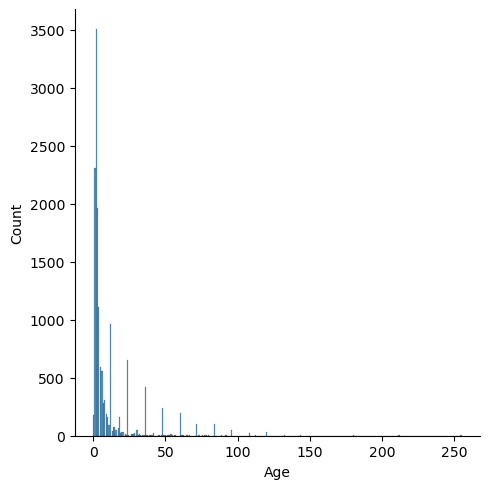

In [42]:
sns.displot(df['Age'], kde = False)

- Distribuição não normal, enviesada para a direita

<AxesSubplot:xlabel='MaturitySize', ylabel='count'>

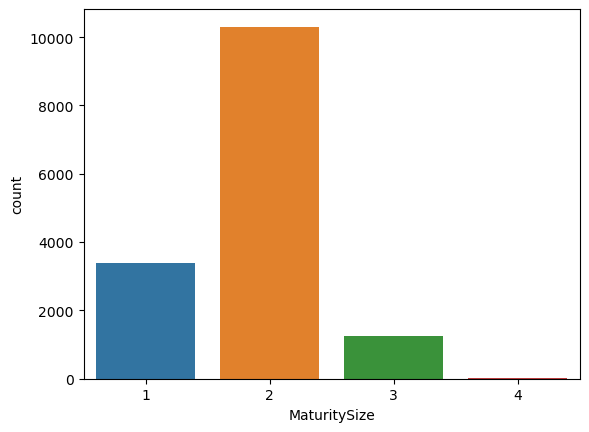

In [43]:
sns.countplot(x='MaturitySize', data=df)

- Maioria dos animais é de porte médio

<AxesSubplot:xlabel='Type', ylabel='AdoptionSpeed'>

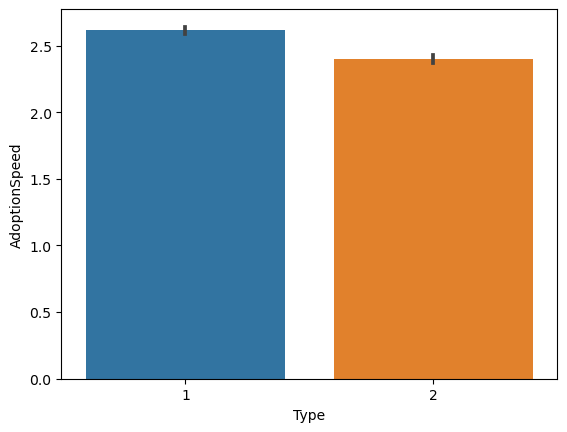

In [44]:
sns.barplot(x='Type', y='AdoptionSpeed', data=df,)

# Área de análise via distribuição de dados

<AxesSubplot:xlabel='Type', ylabel='AdoptionSpeed'>

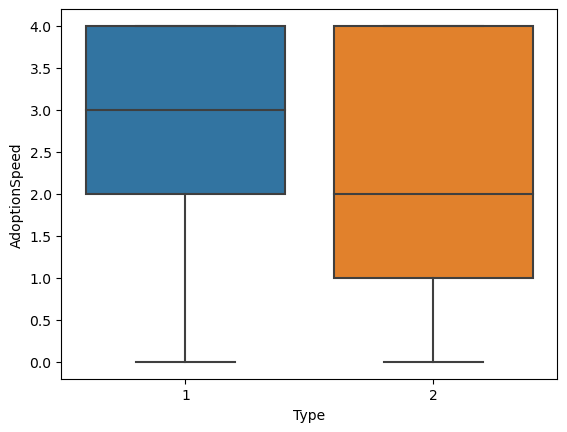

In [50]:
sns.boxplot(x = 'Type', y = 'AdoptionSpeed', data=df)

É possível ver que não há grande variação com as variáveis Type e AdoptionSpeed, mas no Tipo 2 (Gatos), o primeiro quartil (25% das adoções) ocorreu aproximadamente no primeiro mês, enquanto no Tipo 1 (Cachorro), isso só oorre no segundo mês, mostrando uma preferência inicial a esse tipo de animação na base de dados utilizados no estudo.

<AxesSubplot:xlabel='Type', ylabel='AdoptionSpeed'>

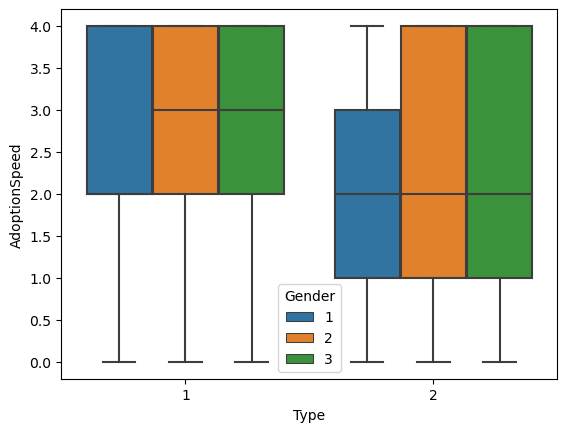

In [51]:
sns.boxplot(x = 'Type', y = 'AdoptionSpeed', data=df, hue='Gender')

Para Cachorros (Tipo 1), os dados não se alteram pelo gênero, mas para gatos (tipo 2), no gênero 1 (macho), 75% das adoções ocorriam em até 3 meses, diferente do gênero feminino e não informado, que estão no quarto mês.

<AxesSubplot:xlabel='Type', ylabel='Fee'>

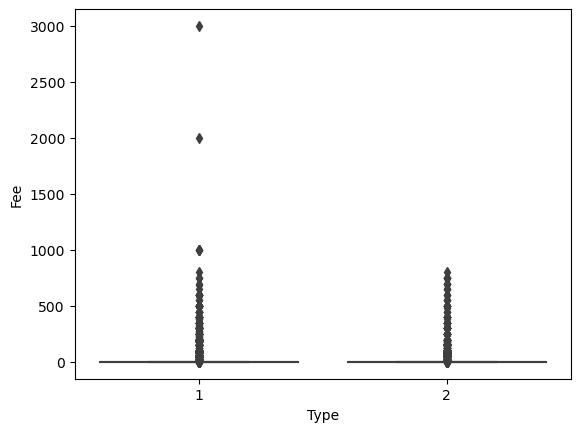

In [52]:
sns.boxplot(x='Type', y='Fee', data=df)

Nesse gráfico, é possível ver que a maioria dos processos de adoção tem a taxa de 0, mas somente em Cachorros (Tipo 1), existem valores acima de 1000.

# Gráficos de correlação

<AxesSubplot:xlabel='Age', ylabel='Fee'>

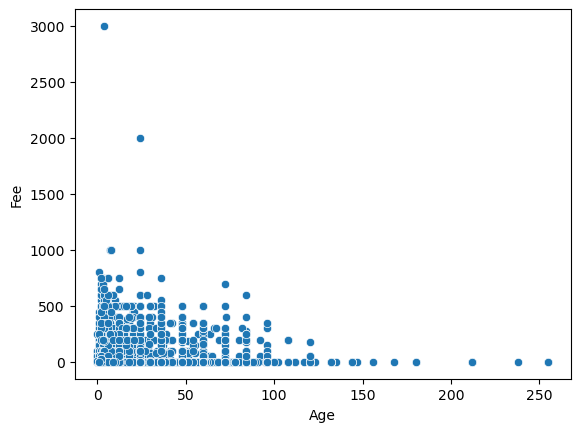

In [55]:
sns.scatterplot(x = 'Age', y = 'Fee', data=df)

C:\Users\Mileno\AppData\Local\Temp\ipykernel_19748\4069964595.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2)) #annot mostra os coeficientes da matriz


<AxesSubplot:>

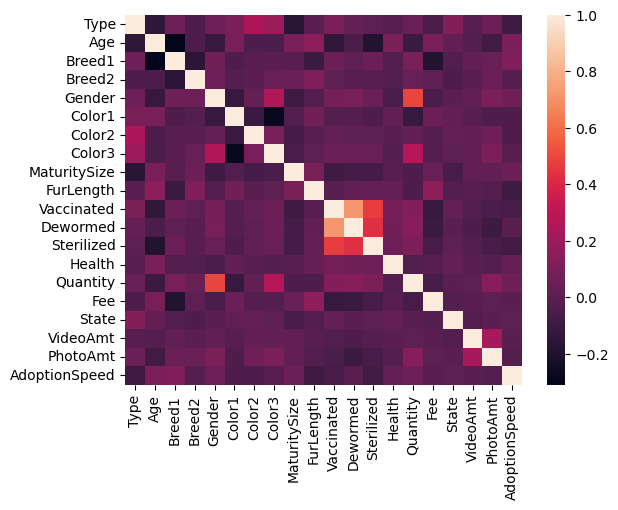

In [72]:
sns.heatmap(df.corr().round(2), anoot = True, fmt = "1.f") #annot mostra os coeficientes da matriz

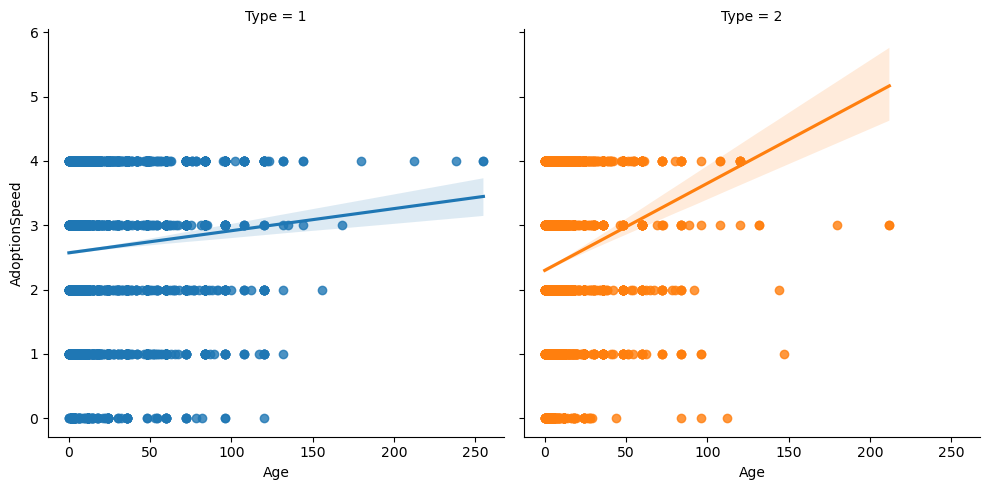

In [73]:
sns.lmplot(x='Age', y='AdoptionSpeed', data=df, hue='Type' , col='Type')

# Considerações finais